In [51]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [52]:
data = pd.read_csv("house_price_prediction_dataset.csv")

In [53]:
data.head()

,square_footage,num_bedrooms,num_bathrooms,age_of_house,lot_size,garage_size,num_floors,proximity_to_schools,proximity_to_shops,crime_rate,...,num_parks_nearby,year_built,renovation_score,num_windows,roof_type,basement_size,num_fireplaces,kitchen_quality,heating_type,target
0,2451,4,3,56,13196,2,0.244333,0.843215,0.098098,-0.546847,...,0.240875,-0.795930,-0.649765,0.887181,0.848465,0.128567,1.485817,-0.742883,1.154029,-2.455798
1,4928,5,2,63,18569,0,0.454673,-1.760636,-0.285096,0.079694,...,-0.472501,0.493254,-1.284945,-0.028902,-2.159269,-1.874056,2.196332,-0.345137,-0.499008,13.052119
2,2389,1,4,9,14818,2,-1.184575,-1.387315,-0.091265,-0.328132,...,0.909184,-0.369620,1.540308,-2.174386,-0.322276,-0.623095,0.263032,-0.891859,-0.510269,27.620586
3,3644,5,4,59,15015,1,-0.659495,-0.262840,1.178087,0.700210,...,-1.124166,-1.156127,0.700972,-1.108765,-1.091047,0.367360,1.602844,1.073340,-2.207548,32.551291
4,2576,3,1,51,19964,0,-0.163580,-0.785582,0.594962,0.854973,...,1.651229,-1.041363,2.771268,-1.408570,0.884184,-0.156176,1.281519,1.825647,-0.886458,56.145996


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   square_footage           20000 non-null  int64  
 1   num_bedrooms             20000 non-null  int64  
 2   num_bathrooms            20000 non-null  int64  
 3   age_of_house             20000 non-null  int64  
 4   lot_size                 20000 non-null  int64  
 5   garage_size              20000 non-null  int64  
 6   num_floors               20000 non-null  float64
 7   proximity_to_schools     20000 non-null  float64
 8   proximity_to_shops       20000 non-null  float64
 9   crime_rate               20000 non-null  float64
 10  public_transport_access  20000 non-null  float64
 11  num_parks_nearby         20000 non-null  float64
 12  year_built               20000 non-null  float64
 13  renovation_score         20000 non-null  float64
 14  num_windows           

In [55]:
data.describe()

,square_footage,num_bedrooms,num_bathrooms,age_of_house,lot_size,garage_size,num_floors,proximity_to_schools,proximity_to_shops,crime_rate,...,num_parks_nearby,year_built,renovation_score,num_windows,roof_type,basement_size,num_fireplaces,kitchen_quality,heating_type,target
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2755.599800,3.490900,2.484700,49.458050,10266.972850,1.002450,0.006618,0.012764,-0.003715,0.002002,...,-0.015310,0.001790,-0.005813,0.004059,-0.007163,0.004682,-0.009168,0.004657,-0.003312,1.308956
std,1298.527905,1.710516,1.119432,28.822787,5615.336111,0.814541,1.001601,1.003785,1.002464,1.000956,...,1.006036,1.000736,1.003048,0.999184,1.000090,1.002127,0.997764,1.005876,1.006907,193.441651
min,500.000000,1.000000,1.000000,0.000000,500.000000,0.000000,-3.729174,-4.004341,-4.003598,-3.856375,...,-4.413886,-3.940590,-3.726141,-4.465604,-3.814205,-4.312973,-3.999332,-4.462969,-4.295391,-792.327499
25%,1634.750000,2.000000,1.000000,25.000000,5426.750000,0.000000,-0.668459,-0.669276,-0.675996,-0.673152,...,-0.695470,-0.675498,-0.682271,-0.667905,-0.690571,-0.672792,-0.671869,-0.675951,-0.686294,-129.436210
50%,2747.000000,3.000000,2.000000,49.000000,10300.500000,1.000000,0.004852,0.009701,-0.006133,-0.001292,...,-0.013497,-0.000190,-0.009882,0.004497,-0.018467,0.002594,-0.009871,0.002404,0.004181,0.679644
75%,3885.000000,5.000000,3.000000,75.000000,15135.000000,2.000000,0.681340,0.692143,0.659096,0.678344,...,0.659948,0.662893,0.667278,0.681398,0.667899,0.682990,0.670030,0.695076,0.675554,131.558207
max,4999.000000,6.000000,4.000000,99.000000,19998.000000,2.000000,3.976868,4.562115,3.691625,4.202026,...,3.767328,3.727833,3.775304,3.699115,3.852731,3.918185,4.479084,3.602832,3.536532,701.950959


In [56]:
data.columns

Index(['square_footage', 'num_bedrooms', 'num_bathrooms', 'age_of_house',
       'lot_size', 'garage_size', 'num_floors', 'proximity_to_schools',
       'proximity_to_shops', 'crime_rate', 'public_transport_access',
       'num_parks_nearby', 'year_built', 'renovation_score', 'num_windows',
       'roof_type', 'basement_size', 'num_fireplaces', 'kitchen_quality',
       'heating_type', 'target'],
      dtype='object')


 name of feature  square_footage 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


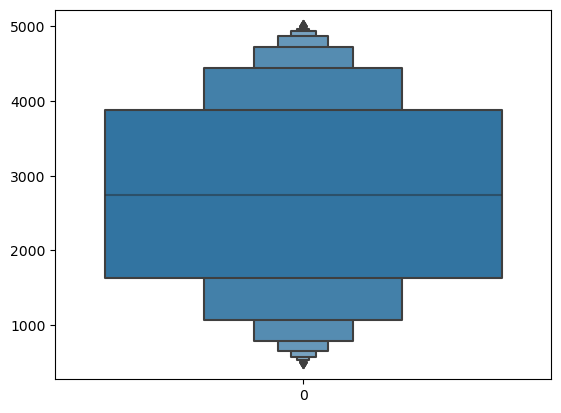


 name of feature  num_bedrooms 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


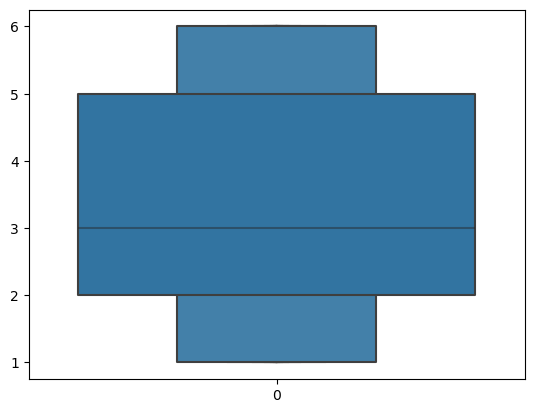


 name of feature  num_bathrooms 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


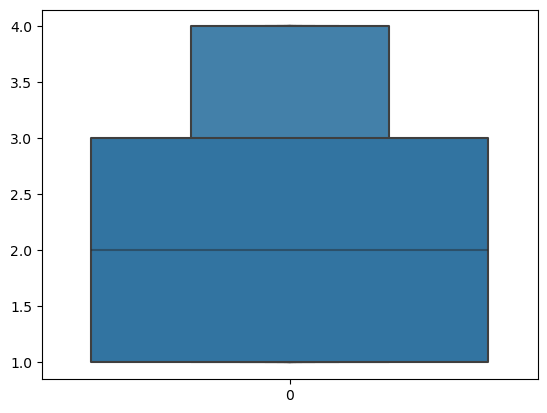


 name of feature  age_of_house 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


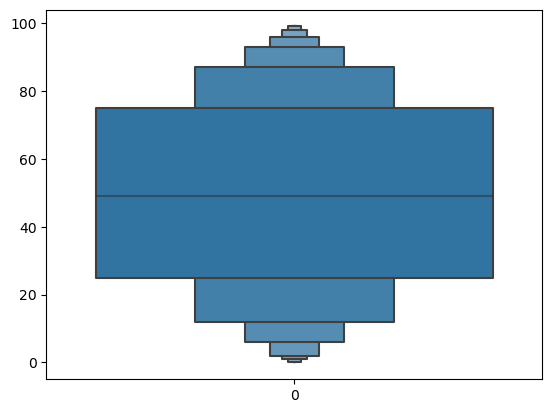


 name of feature  lot_size 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


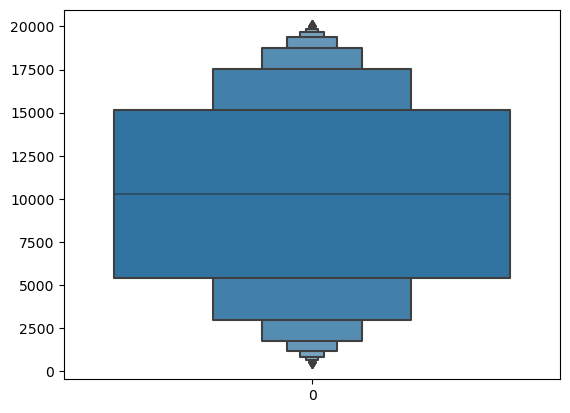


 name of feature  garage_size 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


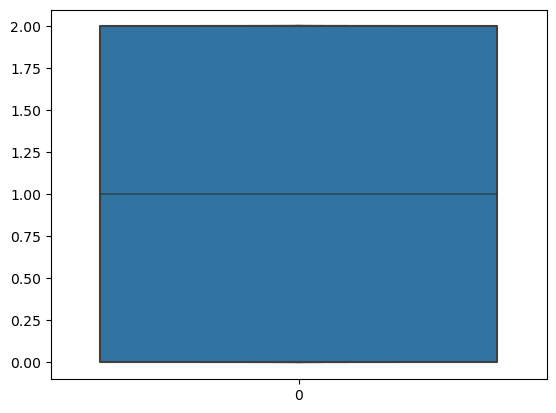


 name of feature  num_floors 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


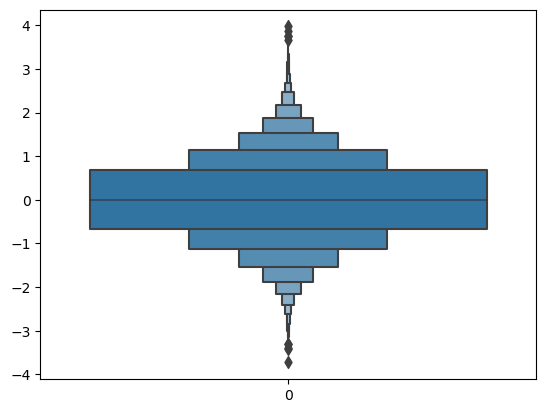


 name of feature  proximity_to_schools 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


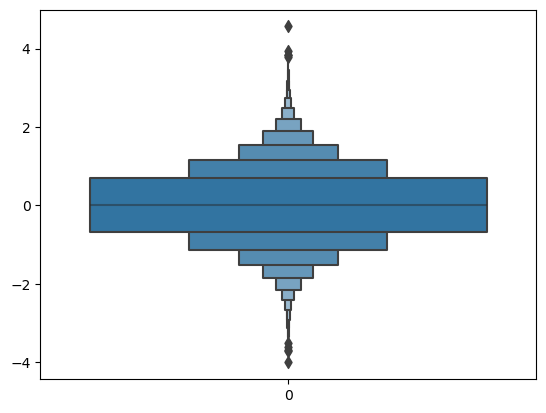


 name of feature  proximity_to_shops 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


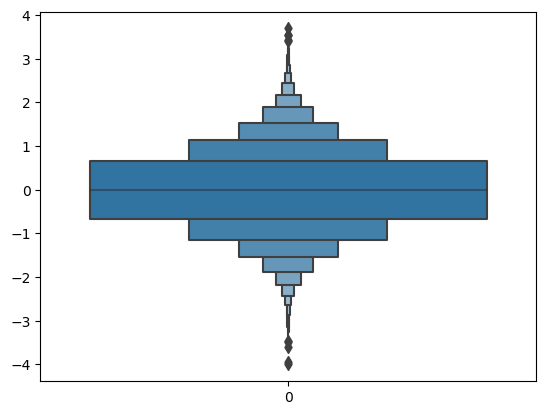


 name of feature  crime_rate 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


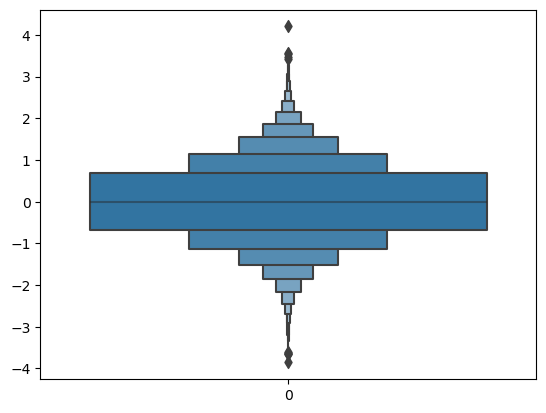


 name of feature  public_transport_access 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


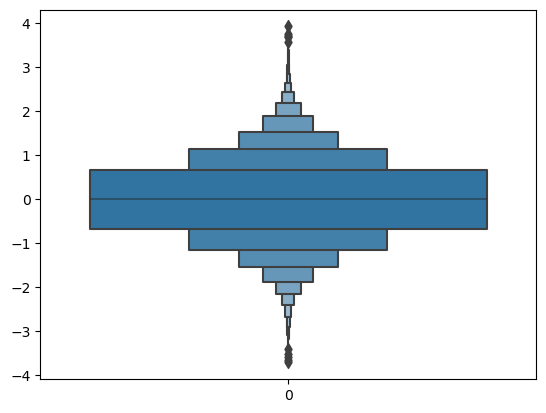


 name of feature  num_parks_nearby 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


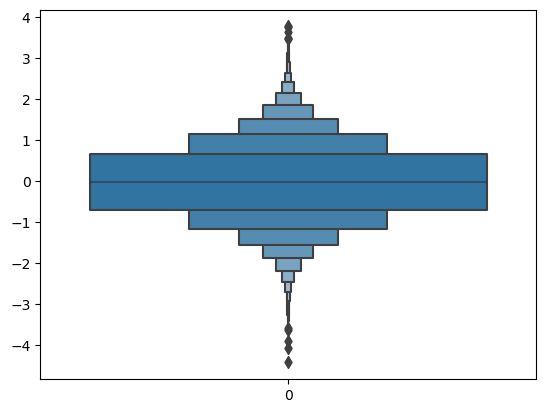


 name of feature  year_built 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


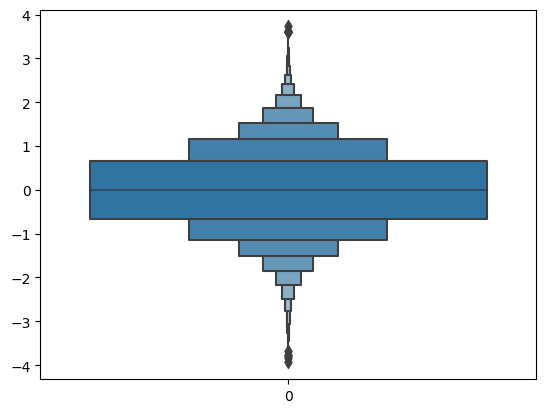


 name of feature  renovation_score 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


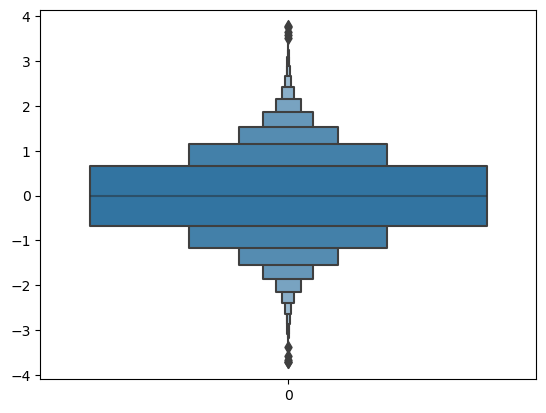

c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):



 name of feature  num_windows 



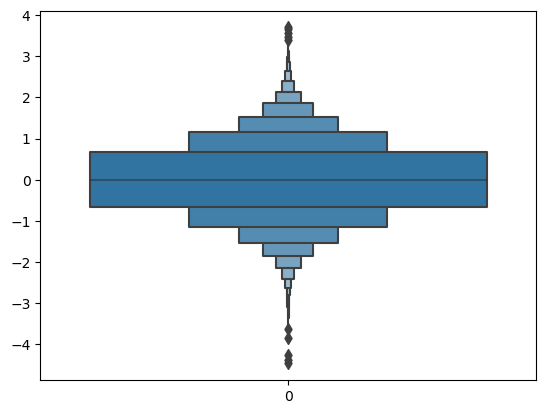


 name of feature  roof_type 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


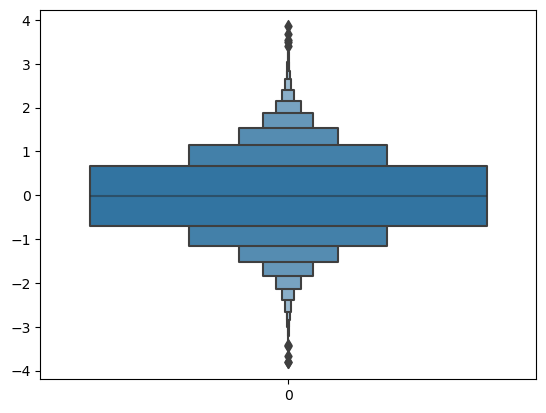


 name of feature  basement_size 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


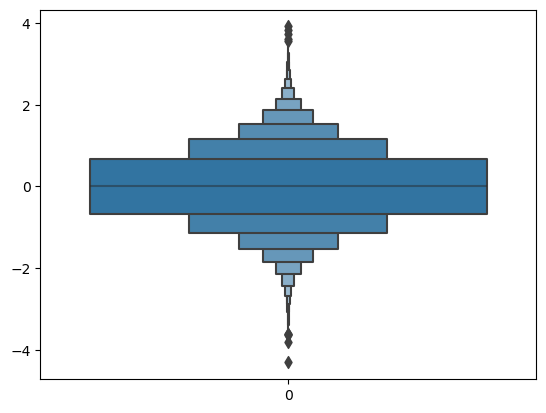


 name of feature  num_fireplaces 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


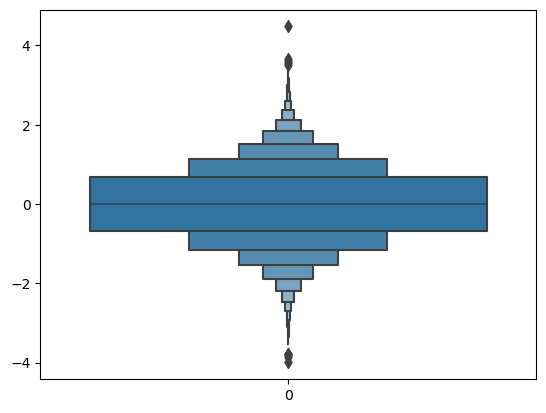


 name of feature  kitchen_quality 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


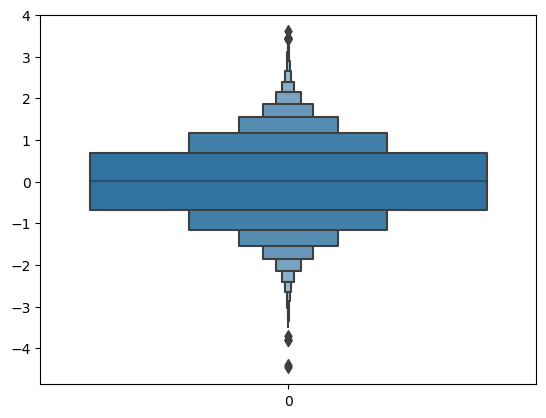


 name of feature  heating_type 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


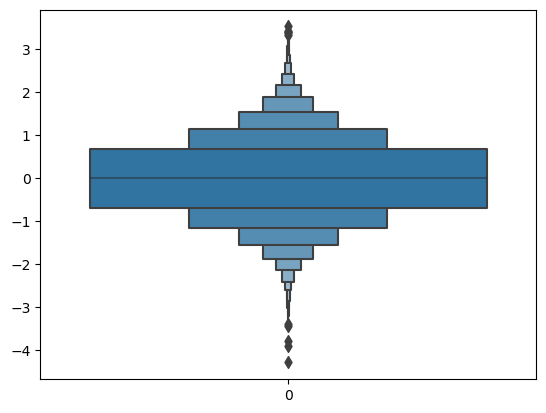


 name of feature  target 



c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


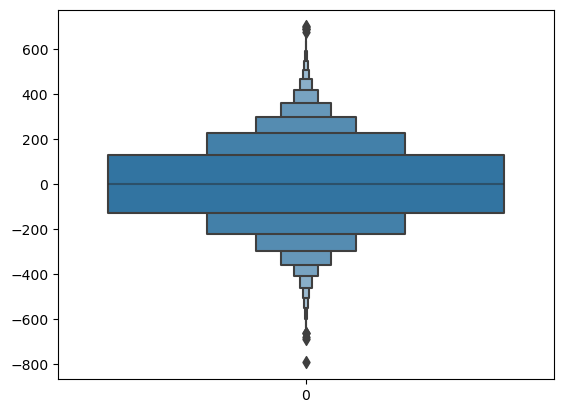

In [57]:

for i in data.columns:
    print("\n name of feature ", i,"\n" )
    sns.boxenplot(data[i])
    plt.show()


the data don't have missing values or categrical data so we will scale it 

In [58]:
from sklearn.preprocessing import StandardScaler
# before we scale we need to split it 
from sklearn.model_selection import train_test_split

x = data.drop(["target"],axis=1)
y= data["target"]
scaler = StandardScaler()

In [59]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.2)

In [60]:
scaled = scaler.fit_transform(xtrain)
transformed = scaler.transform(xtest)

In [61]:
scaled

array([[ 1.67466955, -0.85646708, -0.44824227, ..., -0.41643187,
         1.11059155, -0.84298043],
       [-1.71015176, -1.43584612,  0.44600665, ...,  0.45525804,
        -0.30702205, -0.94401127],
       [-0.09997904,  0.30229102,  1.34025557, ..., -1.24934201,
        -1.10612692, -1.12889427],
       ...,
       [-1.34277106, -1.43584612, -0.44824227, ..., -1.71092519,
        -1.22303523, -1.41130499],
       [ 1.01061741, -0.27708803, -0.44824227, ..., -0.67102416,
        -0.2940948 , -0.32667077],
       [ 0.05527389, -0.27708803,  0.44600665, ...,  0.59818777,
         0.13844904,  0.47519532]])

In [62]:
transformed

array([[ 0.71855744, -1.43584612,  1.34025557, ..., -0.50863822,
        -1.13925605,  0.41720569],
       [ 0.24203855,  0.88167006, -0.44824227, ...,  0.62133155,
        -1.2365182 , -0.4589974 ],
       [-1.51570131,  1.46104911,  0.44600665, ..., -0.52759184,
         1.76724187, -0.27498737],
       ...,
       [-0.4396909 ,  0.30229102,  1.34025557, ..., -0.82430564,
        -0.3414128 , -1.41483049],
       [ 1.64315781, -0.27708803,  0.44600665, ...,  1.35067325,
         1.06985165,  0.20749868],
       [ 0.14058614, -0.27708803, -1.34249119, ..., -1.14376839,
         0.47693138,  0.77322469]])

In [63]:
data 

,square_footage,num_bedrooms,num_bathrooms,age_of_house,lot_size,garage_size,num_floors,proximity_to_schools,proximity_to_shops,crime_rate,...,num_parks_nearby,year_built,renovation_score,num_windows,roof_type,basement_size,num_fireplaces,kitchen_quality,heating_type,target
0,2451,4,3,56,13196,2,0.244333,0.843215,0.098098,-0.546847,...,0.240875,-0.795930,-0.649765,0.887181,0.848465,0.128567,1.485817,-0.742883,1.154029,-2.455798
1,4928,5,2,63,18569,0,0.454673,-1.760636,-0.285096,0.079694,...,-0.472501,0.493254,-1.284945,-0.028902,-2.159269,-1.874056,2.196332,-0.345137,-0.499008,13.052119
2,2389,1,4,9,14818,2,-1.184575,-1.387315,-0.091265,-0.328132,...,0.909184,-0.369620,1.540308,-2.174386,-0.322276,-0.623095,0.263032,-0.891859,-0.510269,27.620586
3,3644,5,4,59,15015,1,-0.659495,-0.262840,1.178087,0.700210,...,-1.124166,-1.156127,0.700972,-1.108765,-1.091047,0.367360,1.602844,1.073340,-2.207548,32.551291
4,2576,3,1,51,19964,0,-0.163580,-0.785582,0.594962,0.854973,...,1.651229,-1.041363,2.771268,-1.408570,0.884184,-0.156176,1.281519,1.825647,-0.886458,56.145996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,678,5,2,6,6936,2,0.777769,0.078542,-0.356311,-0.398955,...,-0.506210,-0.747032,-0.336869,0.904493,-0.087552,-0.374312,-0.981091,-0.295182,0.883601,-163.908175
19996,3611,5,1,52,6185,0,0.203811,-1.329880,0.290043,-1.316666,...,0.897976,-0.420326,-0.108279,-0.011605,0.028023,2.218259,1.338039,0.206137,1.755493,186.163895
19997,3183,4,1,70,15003,1,1.026136,-0.897361,-1.536068,0.632421,...,1.185792,-0.557899,-0.632084,-0.020402,-0.781487,0.070400,-0.276101,1.005627,-0.678395,65.743242
19998,1890,3,1,25,5650,1,1.385300,-0.369737,-0.053254,0.099442,...,-1.867319,0.446476,-1.233940,-0.699977,0.853863,-0.388240,-0.404607,0.978464,-0.451392,-174.160925


## LinearRegression

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
model=LinearRegression()

In [66]:
model.fit(scaled,ytrain)

LinearRegression()

In [67]:
ypred=model.predict(transformed)

In [68]:
ypred

array([ -89.21561801,  -92.50762445,   96.04594365, ..., -137.35099886,
         52.32868158,   -9.72420804])

In [69]:
ytest

5715      22.782195
18344   -187.152219
1437     123.744927
14252     75.288325
8307    -325.363833
            ...    
10566    593.534746
9594     310.278667
5669    -269.122679
18796   -196.463609
18256    -31.720402
Name: target, Length: 16000, dtype: float64

In [70]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [71]:
print("Absloute error",mean_absolute_error(ytest,ypred))
print("Squared error",mean_squared_error(ytest,ypred))
print("root mean Squared error",np.sqrt(mean_squared_error(ytest,ypred)))

Absloute error 104.00724650380167
Squared error 17045.49187132664
root mean Squared error 130.5583849139022


## SVM

In [82]:
from sklearn.svm import SVR

In [91]:
model=SVR(C=3 , gamma= 4 , kernel= "rbf")
model.fit(X=scaled,y=ytrain)

SVR(C=3, gamma=4)

In [92]:
ypredict = model.predict(X=transformed)

In [93]:
ypredict

array([-4.72588824, -4.72588824, -4.72588824, ..., -4.72588824,
       -4.72588824, -4.72588824])

In [96]:
print("Absloute error",mean_absolute_error(ytest,ypred))
print("Squared error",mean_squared_error(ytest,ypred))
print("root mean Squared error",np.sqrt(mean_squared_error(ytest,ypred)))

Absloute error 162.19306916131163
Squared error 41506.676242565365
root mean Squared error 203.73187340856944


## DecisionTreeRegressor

In [97]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()


In [98]:
model.fit(scaled,ytrain)

DecisionTreeRegressor()

In [99]:
ypred=model.predict(transformed)

In [100]:
print("Absloute error",mean_absolute_error(ytest,ypred))
print("Squared error",mean_squared_error(ytest,ypred))
print("root mean Squared error",np.sqrt(mean_squared_error(ytest,ypred)))

Absloute error 163.24834319063044
Squared error 41915.85179749826
root mean Squared error 204.73361179224642


The best model is Linear Reg for it's error is 104.00724650380167 which is the least error rate